# Visualization and forecasting of the stock prices of AMZN and WMT
*  Andrew Yang on his podcast with Ethan Klein (https://www.youtube.com/watch?v=RwHo_JBUo4k) says that Walmart was akin to a military tank in the US retail space,crushing any competitor that came in it's way , but Amazon is like a UFO, hovering over it's competition and completely dominating the retail sector.
* A good measure for confidence in the growth of a company is it's stock price.
* We visualize the evolution of stock prices of AMZN and WMT from 2006 to 2018 and also employ various forecasting techniques to decide future prices

In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-time-series-20050101-to-20171231/CAT_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/UTX_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/PFE_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/PG_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/UNH_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/JNJ_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/VZ_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/AABA_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/BA_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/KO_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/MCD_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/MRK_

In [48]:
url_amazon = '../input/stock-time-series-20050101-to-20171231/AMZN_2006-01-01_to_2018-01-01.csv'
url_walmart = '../input/stock-time-series-20050101-to-20171231/WMT_2006-01-01_to_2018-01-01.csv'


In [49]:
#Get the data and have a look at it

url_stocks='../input/stock-time-series-20050101-to-20171231/all_stocks_2006-01-01_to_2018-01-01.csv'
#url_stocks_recent='../input/stock-time-series-20050101-to-20171231/all_stocks_2017-01-01_to_2018-01-01.csv'


stocks_df=pd.read_csv(url_stocks,index_col='Date',parse_dates=[0])
#stocks_recent_df=pd.read_csv(url_stocks_recent,index_col='Date',parse_dates=[0])
print(stocks_df.head())


             Open   High    Low  Close   Volume Name
Date                                                
2006-01-03  77.76  79.35  77.24  79.11  3117200  MMM
2006-01-04  79.49  79.49  78.25  78.71  2558000  MMM
2006-01-05  78.41  78.65  77.56  77.99  2529500  MMM
2006-01-06  78.64  78.90  77.64  78.63  2479500  MMM
2006-01-09  78.50  79.83  78.46  79.02  1845600  MMM


In [50]:
#Slicing out the data we need
df=stocks_df[(stocks_df.Name=='AMZN') | (stocks_df.Name=='WMT')]
print(df.head())


             Open   High    Low  Close    Volume Name
Date                                                 
2006-01-03  46.36  46.66  45.57  46.23  23413900  WMT
2006-01-04  46.24  46.50  46.10  46.32  14090700  WMT
2006-01-05  46.00  46.40  45.29  45.69  20759200  WMT
2006-01-06  45.69  45.88  45.10  45.88  21135000  WMT
2006-01-09  45.89  46.15  45.56  45.71  14890700  WMT


In [51]:
#Checking for null values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6039 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6038 non-null   float64
 1   High    6038 non-null   float64
 2   Low     6038 non-null   float64
 3   Close   6039 non-null   float64
 4   Volume  6039 non-null   int64  
 5   Name    6039 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 330.3+ KB
None


In [52]:
#Drop the single row with a Null value
df.dropna(axis=0,inplace=True)
print(df.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
#Separting the amazon and walmart data 
amzn_df=df[df.Name=='AMZN']
wmt_df=df[df.Name=='WMT']

In [54]:
#Basic statistics of amazon data
print(amzn_df.describe())


              Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean    299.335310   302.371163   296.037695   299.376231  5.931712e+06
std     280.120547   281.826442   277.927134   279.980161  5.122034e+06
min      26.090000    26.300000    25.760000    26.070000  9.864350e+05
25%      81.175000    82.580000    79.725000    81.090000  3.137037e+06
50%     205.330000   208.000000   202.100000   205.440000  4.724100e+06
75%     375.570000   379.155000   373.000000   375.140000  7.135246e+06
max    1204.880000  1213.410000  1191.150000  1195.830000  1.044046e+08


In [55]:
#Basic statistics of walmart data
print(wmt_df.describe())

              Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     62.250527    62.729801    61.805094    62.274419  1.246078e+07
std      12.735157    12.758600    12.722236    12.745512  7.574975e+06
min      42.390000    42.680000    42.090000    42.270000  1.712675e+06
25%      50.800000    51.350000    50.335000    50.870000  7.099182e+06
50%      58.990000    59.530000    58.570000    59.030000  1.035036e+07
75%      73.800000    74.150000    73.350000    73.760000  1.563728e+07
max      99.910000   100.130000    99.120000    99.620000  9.283877e+07


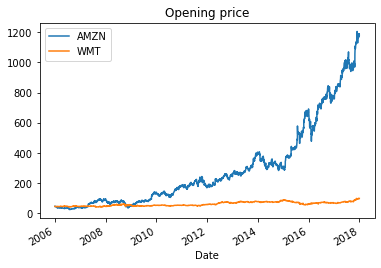

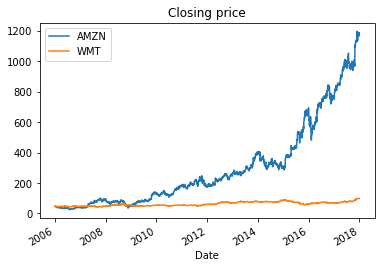

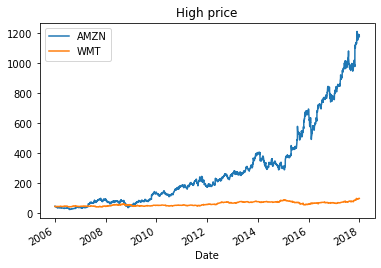

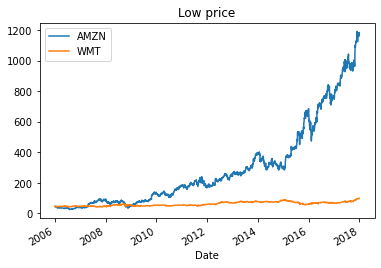

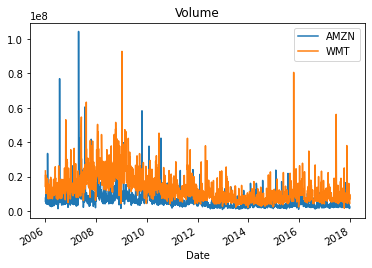

In [56]:
#Basic Plots
plt.title("Opening price")
amzn_df['Open'].plot(label='AMZN')
wmt_df['Open'].plot(label='WMT')
plt.legend()
plt.show()
plt.title("Closing price")
amzn_df['Close'].plot(label='AMZN')
wmt_df['Close'].plot(label='WMT')
plt.legend()
plt.show()
plt.title("High price")
amzn_df['High'].plot(label='AMZN')
wmt_df['High'].plot(label='WMT')
plt.legend()
plt.show()
plt.title("Low price")
amzn_df['Low'].plot(label='AMZN')
wmt_df['Low'].plot(label='WMT')
plt.legend()
plt.show()
plt.title("Volume")
amzn_df['Volume'].plot(label='AMZN')
wmt_df['Volume'].plot(label='WMT')
plt.legend()
plt.show()


* Notice the rapid growth of Amazon compared to the lack of growth of Walmart
* One can also notice the effect of the 2008 financial crisis as we can see a dip in the stock prices of AMZN and WMT then

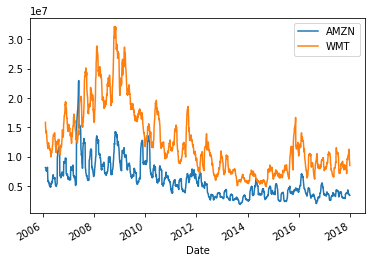

In [57]:
# We smoothen out the volume plot by taking rolling averages of 25 days
amzn_vol_mean=amzn_df['Volume'].rolling(window=25).mean()
wmt_vol_mean=wmt_df['Volume'].rolling(window=25).mean()


amzn_vol_mean.plot(label='AMZN')
wmt_vol_mean.plot(label='WMT')
plt.legend()
plt.show()



* High volume in 2008 of WMT stock might be because of investors selling due to fear of the market crashing

# Histograms and KDE plots

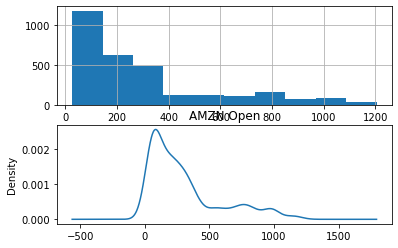

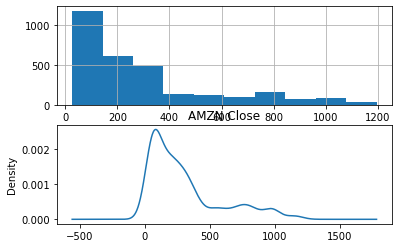

In [58]:
plt.figure(1)
plt.subplot(211)
amzn_df['Open'].hist()
plt.subplot(212)
amzn_df['Open'].plot(kind='kde')
plt.title("AMZN Open")
plt.show()

plt.figure(1)
plt.subplot(211)
amzn_df['Close'].hist()
plt.subplot(212)
amzn_df['Close'].plot(kind='kde')
plt.title("AMZN Close")
plt.show()

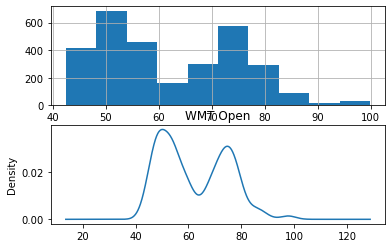

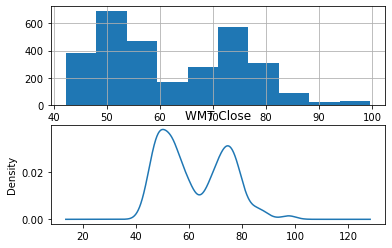

In [59]:
plt.figure(1)
plt.subplot(211)
wmt_df['Open'].hist()
plt.subplot(212)
wmt_df['Open'].plot(kind='kde')
plt.title("WMT Open")
plt.show()
plt.figure(1)
plt.subplot(211)
wmt_df['Close'].hist()
plt.subplot(212)
wmt_df['Close'].plot(kind='kde')
plt.title("WMT Close")
plt.show()

* Looks like a double gaussian distribution

# **Yearly and Monthly trends**

We plot yearly and monthly trends of the opening amzn and wmt stocks

In [60]:
#Get non indexed version of data
data = pd.read_csv(url_stocks,parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data.head()

,Date,Open,High,Low,Close,Volume,Name,year,month
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,1
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,1
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,1
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,1
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,1


In [61]:
amzn_data=data[data.Name == 'AMZN']
wmt_data=data[data.Name == 'WMT']

Text(0, 0.5, 'Open price of AMZN')

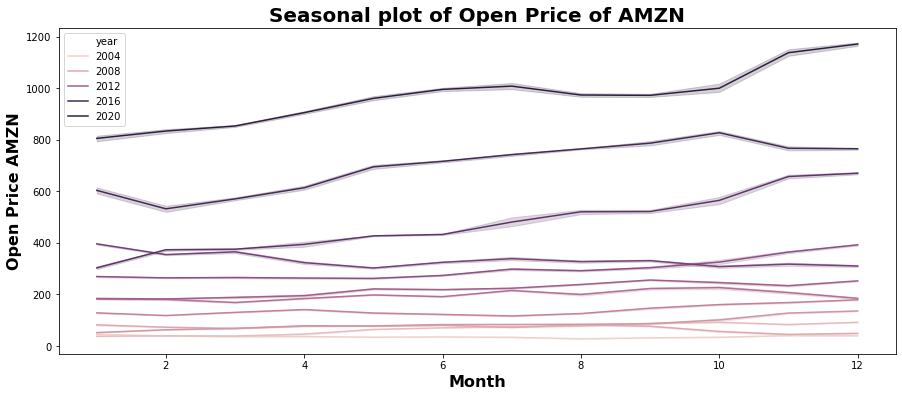

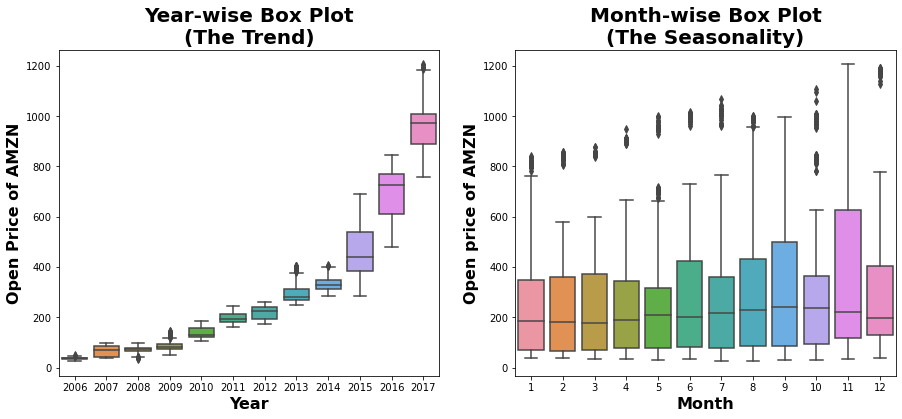

In [62]:
import seaborn as sns
variable = 'Open'
fig, ax = plt.subplots(figsize=(15, 6))
d=amzn_data
sns.lineplot(d['month'], d[variable], hue=d['year'])
ax.set_title('Seasonal plot of Open Price of AMZN', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Open Price AMZN', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(d['year'], d[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Open Price of AMZN', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(d['month'], d[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Open price of AMZN', fontsize = 16, fontdict=dict(weight='bold'))


* From the first plot it is clear that Amazon's growth is actually acclerating

Text(0, 0.5, 'Open price of WMT')

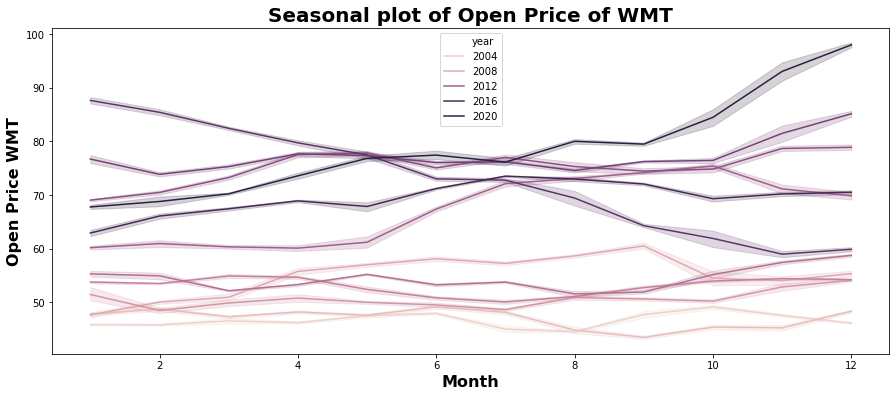

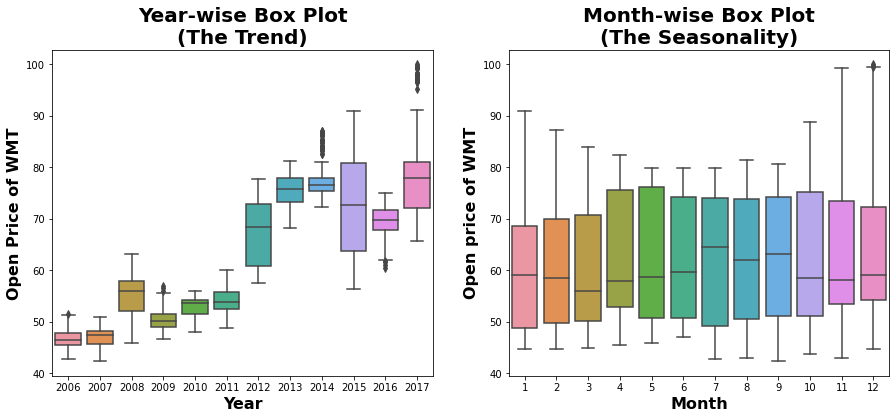

In [63]:
variable = 'Open'
fig, ax = plt.subplots(figsize=(15, 6))
d=wmt_data
sns.lineplot(d['month'], d[variable], hue=d['year'])
ax.set_title('Seasonal plot of Open Price of WMT', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Open Price WMT', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(d['year'], d[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Open Price of WMT', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(d['month'], d[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Open price of WMT', fontsize = 16, fontdict=dict(weight='bold'))

* WMT stock seems to slow down as time progresses, curve in the yearly box plot looks like a sigmoid function

# Helper function

* Think of the stock price at time t,t+1,t+2,...t+n to be a function of the price at times t-1,t-2,...t-k where k is a parameter we have to optimize over.
* The features will therefore be X_t-1,X_t-2,,,X_t-k and the output of X_t+1,X_t+2,...X_t+n and we need to extract this carefully using the pandas shift() function

In [67]:
#Helper function to extract the needed data
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[0]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f"var_t-{i}") for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'var_t') for j in range(n_vars)]
        else:
            names += [(f'var_t+{i}') for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# ACF and PACF plots

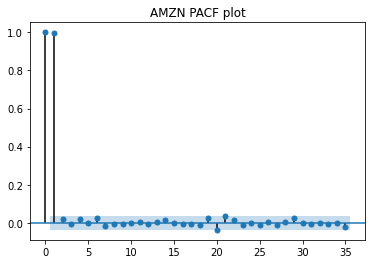

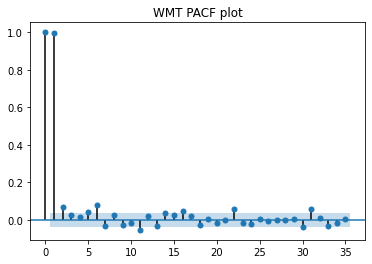

In [68]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(amzn_train.values)
plt.title("AMZN PACF plot")
plt.show()

plot_pacf(wmt_train.values)
plt.title("WMT PACF plot")
plt.show()

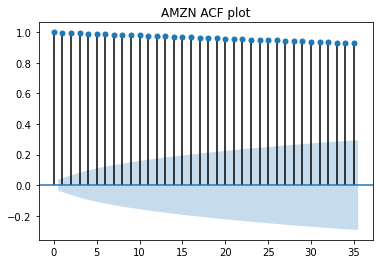

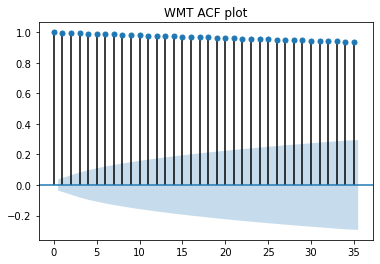

In [69]:
from statsmodels.graphics.tsaplots import plot_acf

#plot_acf helps finding q
plot_acf(amzn_train)
plt.title("AMZN ACF plot")
plt.show()

plot_acf(wmt_train)
plt.title("WMT ACF plot")
plt.show()

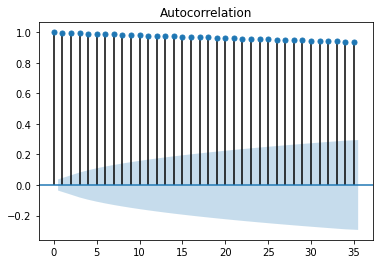

In [70]:
plot_acf(wmt_train)
plt.show()

High first order autocorrelation suggests that both the time series have a unit root

# Dickey Fuller test

We want to check if our time series has stationarity, presence of a unit root contradicts this assumption

We statistically test the presence of a unit root.

**Null hypothesis** - Time series has a unit root

**Alternate Hypothesis** - No unit root

We use the t statistic to find the lag no, we start with the max lag and keep dropping the last parameter as long as the t statistic on last lag value is significant when doing a 5% test.

We set the regression parameter as 'ctt', while performing the adfuller test, as we notice a constant, linear and quadratic trend in the amazon stock prices

In [71]:
from statsmodels.tsa.stattools import adfuller

X = amzn_train.values
result = adfuller(X,regression = 'ctt',autolag = 't-stat')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print('No of lag variables used in regression: %f' %result[2])

ADF Statistic: -2.111003
p-value: 0.771047
Critical Values:
	1%: -4.375
	5%: -3.834
	10%: -3.555
No of lag variables used in regression: 28.000000


Since ADF value = -2.74 > -3.555 = critical value at 5%

We accept the null hypothesis that a unit root is present. 

Check if a unit root is present in the differenced series.

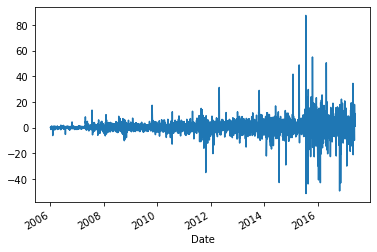

In [72]:
amzn_diff_df = amzn_train - amzn_train.shift(1)


amzn_diff_df.plot()

Observe the lack of a trend. Only constant is included in the regression parameter

In [73]:
X = amzn_diff_df[1:].values
result = adfuller(X,regression = 'c',autolag = 't-stat')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print('No of lag variables used in regression: %f' %result[2])

ADF Statistic: -9.234435
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
No of lag variables used in regression: 27.000000


Since ADF value = -9.72 < -2.863 = critical value at 5%

We reject the null hypothesis that a unit root is present in the differenced series.


In [74]:
X = wmt_train.values
result = adfuller(X,regression = 'ct',autolag = 't-stat')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print('No of lag variables used in regression: %f' %result[2])

ADF Statistic: -2.320153
p-value: 0.422836
Critical Values:
	1%: -3.962
	5%: -3.412
	10%: -3.128
No of lag variables used in regression: 21.000000


Since ADF value = -2.49 > -3.412 = critical value at 5%

We accept the null hypothesis that a unit root is present. 

Check if a unit root is present in the differenced series.

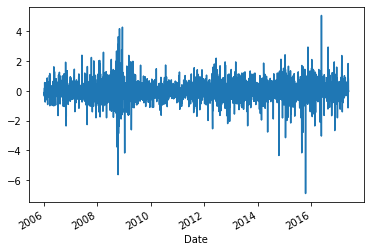

In [75]:
wmt_diff_df = wmt_train - wmt_train.shift(1)


wmt_diff_df.plot()

In [76]:
X = wmt_diff_df[1:].values
result = adfuller(X,regression = 'c',autolag = 't-stat')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print('No of lag variables used in regression: %f' %result[2])

ADF Statistic: -9.531866
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
No of lag variables used in regression: 28.000000


Since ADF value = -10.792 < -2.863 = critical value at 5%

We reject the null hypothesis that a unit root is present in the differenced series.


# VECTOR AUTOREGRESSION

We want to check if the the stock price of AMZN stock affects the stock price of WMT and also do forecasting of these prices, so we use a VAR model for prediction.


# GRANGER CAUSALITY TEST

Want to check if future values of WMT stock or AMZN stock is affected by past values of AMZN stock and WMT stock respectively.

Granger test assumes stationarity so we perform this on the differenced data

In [77]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=22 #seen from t_test from ADF test


diff_df = pd.concat([amzn_diff_df,wmt_diff_df],axis = 1).dropna()
#diff_df.columns = ['AMZN diff','WMT diff']

grangercausalitytests(diff_df, maxlag=maxlag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8368  , p=0.0922  , df_denom=2862, df_num=1
ssr based chi2 test:   chi2=2.8398  , p=0.0920  , df=1
likelihood ratio test: chi2=2.8384  , p=0.0920  , df=1
parameter F test:         F=2.8368  , p=0.0922  , df_denom=2862, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7543  , p=0.1732  , df_denom=2859, df_num=2
ssr based chi2 test:   chi2=3.5147  , p=0.1725  , df=2
likelihood ratio test: chi2=3.5125  , p=0.1727  , df=2
parameter F test:         F=1.7543  , p=0.1732  , df_denom=2859, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3942  , p=0.2427  , df_denom=2856, df_num=3
ssr based chi2 test:   chi2=4.1927  , p=0.2414  , df=3
likelihood ratio test: chi2=4.1896  , p=0.2417  , df=3
parameter F test:         F=1.3942  , p=0.2427  , df_denom=2856, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1591  , p=0.

{1: ({'ssr_ftest': (2.8368478060538784, 0.0922338155874276, 2862.0, 1),
   'ssr_chi2test': (2.8398214410707063, 0.0919544317566027, 1),
   'lrtest': (2.8384149383418844, 0.09203496074541993, 1),
   'params_ftest': (2.8368478060537057, 0.0922338155874276, 2862.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.7542799951845516, 0.17321798473184286, 2859.0, 2),
   'ssr_chi2test': (3.5146959819577166, 0.17250173389796075, 2),
   'lrtest': (3.512541130232421, 0.17268769188739855, 2),
   'params_ftest': (1.7542799951848465, 0.1732179847317704, 2859.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.394150180467605, 0.24265954622935543, 2856.0, 3),
   'ssr_chi2test': (4.19270164567096, 0.24139360535775542, 3),
   'lrtest': (4.189634652331733, 0.24170170405433736, 3),
   'params_ftest': (1.394150180467557, 0.24265954622935543, 2856.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

Observe that for lag values of greater than 6 we observe p values of less than 0.05, so the results are statistically significant and hence we reject the null hypothesis that past values of wmt stock don't influence the future values of amzn stock.

In [78]:
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.api import VAR

In [79]:
model = VAR(diff_df)
x = model.select_order(maxlags=21)
x.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,AIC,BIC,FPE,HQIC
0,2.943,2.947,18.98,2.945
1,2.929,2.942*,18.71,2.934*
2,2.929,2.950,18.70,2.936
3,2.930,2.959,18.72,2.940
4,2.930,2.968,18.73,2.943
5,2.926,2.972,18.66,2.943
6,2.926,2.981,18.66,2.946
7,2.928,2.990,18.68,2.950
8,2.929,3.000,18.70,2.954
9,2.928,3.008,18.69,2.957


Min value for AIC is achieved with lag order of 6.

In [80]:
model_var = model.fit(6)
model_var.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 22, Jan, 2021
Time:                     02:44:55
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.97206
Nobs:                     2860.00    HQIC:                   2.93742
Log likelihood:          -12262.9    FPE:                    18.5022
AIC:                      2.91789    Det(Omega_mle):         18.3351
--------------------------------------------------------------------
Results for equation Open
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.363349         0.116107            3.129           0.002
L1.Open        -0.061509         0.019238           -3.197           0.001
L1.Open        -0.294301         0.165359           -1.780           0.075
L2.Open   

In [81]:
#Predict and compute error 

amzn_test_diff = amzn_test - amzn_test.shift(1)
wmt_test_diff = wmt_test - wmt_test.shift(1)
diff_df_test = pd.concat([amzn_test_diff,wmt_test_diff],axis = 1).dropna()


diff_predict = model_var.forecast(model_var.y, steps = diff_df_test.shape[0])
diff_predict

/opt/conda/lib/python3.7/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


array([[ 0.12814109, -0.2015872 ],
       [-1.14655703, -0.08240738],
       [ 0.4610917 ,  0.13937141],
       [ 0.00439308,  0.03870212],
       [ 0.62175041,  0.06608242],
       [ 0.35436461,  0.01842127],
       [ 0.38543577,  0.00353016],
       [ 0.26115804, -0.00983342],
       [ 0.31241147,  0.01329061],
       [ 0.2968501 ,  0.00747281],
       [ 0.32673707,  0.01474475],
       [ 0.327492  ,  0.01282697],
       [ 0.33253181,  0.0126505 ],
       [ 0.32572901,  0.01030582],
       [ 0.32508964,  0.01143721],
       [ 0.32360534,  0.01086478],
       [ 0.32388123,  0.01136321],
       [ 0.3243874 ,  0.0113871 ],
       [ 0.3249264 ,  0.01150354],
       [ 0.32490339,  0.01134291],
       [ 0.32482273,  0.01138632],
       [ 0.32476056,  0.01133553],
       [ 0.32467323,  0.01134754],
       [ 0.3246803 ,  0.01135036],
       [ 0.32470104,  0.01136462],
       [ 0.32472077,  0.01135883],
       [ 0.32472117,  0.01136162],
       [ 0.32472566,  0.01135908],
       [ 0.32471862,

In [82]:
predict_values = np.cumsum(diff_predict,axis = 0) + [amzn_train[-1],wmt_train[-1]]
predict_values

array([[ 984.97814109,   78.3584128 ],
       [ 983.83158405,   78.27600542],
       [ 984.29267575,   78.41537683],
       [ 984.29706883,   78.45407895],
       [ 984.91881924,   78.52016137],
       [ 985.27318385,   78.53858264],
       [ 985.65861962,   78.5421128 ],
       [ 985.91977766,   78.53227938],
       [ 986.23218913,   78.54557   ],
       [ 986.52903923,   78.55304281],
       [ 986.8557763 ,   78.56778756],
       [ 987.1832683 ,   78.58061453],
       [ 987.51580012,   78.59326503],
       [ 987.84152913,   78.60357086],
       [ 988.16661876,   78.61500807],
       [ 988.49022411,   78.62587285],
       [ 988.81410534,   78.63723605],
       [ 989.13849274,   78.64862316],
       [ 989.46341914,   78.6601267 ],
       [ 989.78832253,   78.67146961],
       [ 990.11314526,   78.68285593],
       [ 990.43790582,   78.69419145],
       [ 990.76257904,   78.705539  ],
       [ 991.08725934,   78.71688936],
       [ 991.41196038,   78.72825398],
       [ 991.73668115,   

In [83]:
predict_values.shape

(149, 2)

In [84]:
print(" Error in prediction of amazon stock for a week is ", predict_values[:7,0]-amzn_test[2:9])

 Error in prediction of amazon stock for a week is  Date
2017-05-31   -15.021859
2017-06-01   -14.758416
2017-06-02   -14.697324
2017-06-05   -22.932931
2017-06-06   -27.081181
2017-06-07   -20.676816
2017-06-08   -26.401380
Name: Open, dtype: float64


In [85]:
print(" Error in prediction of wmt stock for a week is ", predict_values[:7,1]-wmt_test[2:9])

 Error in prediction of wmt stock for a week is  Date
2017-05-30    0.358413
2017-05-31   -0.073995
2017-06-01   -0.224623
2017-06-02   -1.345921
2017-06-05   -1.079839
2017-06-06   -0.891417
2017-06-07   -0.537887
Name: Open, dtype: float64


# Naive model for forecasting

* Occam's Razor suggests that our model should be as simple as it can be. 
* Therefore we first build simple models and evaluate on those.
* The first model we use is the persistence model predicts that the stock price of tomorrow is the same as the price of today
* All the other models we work with must atleast be as accurate as this model.

In [86]:
#Shifting by prices by one day
amzn_shifted=amzn_stock.shift(periods=1)
wmt_shifted=wmt_stock.shift(periods=1)
print(amzn_shifted.head())

Date
2006-01-03      NaN
2006-01-04    47.47
2006-01-05    47.48
2006-01-06    47.16
2006-01-09    47.97
Name: Open, dtype: float64


In [87]:
amzn_train=amzn_stock[:train_size]
amzn_test=amzn_stock[train_size:]
wmt_train=wmt_stock[:train_size]
wmt_test=wmt_stock[train_size:]
test_size=amzn_test.size
print(amzn_test.size)

151


In [88]:

# Our predicted value at time t is just the known value at time t-1

amzn_naive_error=np.sum(np.abs(np.array(amzn_stock[train_size:])-np.array(amzn_shifted[train_size:])))
wmt_naive_error=np.sum(np.abs(np.array(wmt_stock[train_size:])-np.array(wmt_shifted[train_size:])))
print(amzn_naive_error,wmt_naive_error)

1467.2399999999998 100.87999999999994


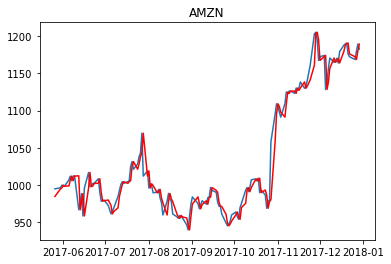

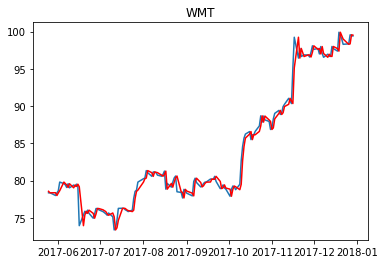

In [89]:
plt.plot(amzn_stock[train_size:],label="True")
plt.plot(amzn_shifted[train_size:],label="Predicted",color="red")
plt.title("AMZN")
plt.show()

plt.plot(wmt_stock[train_size:],label="True")
plt.plot(wmt_shifted[train_size:],label="Predicted",color="red")
plt.title("WMT")
plt.show()

# ARIMA model

* We now build the Arima model in order to predict the stock price. This combines our previous methods of forecasting.
* The Arima model is made of the following 3 components-:
1. AutoRegressive (AR) with parameter 'p' - 'p' must be chosen such that there is a high value of absolute correlation b/w today's and the past p days stock price
2. Integrated (I) with parameter 'd' - 'd' is chosen such that after taking the dth order difference((X_t-X_t-1)-(X_t-1 - X_t-2)-...-(X_t-d+1-X_t-d)) we must have stationary values as t varies
3. Rolling Averages with parameter 'q' - q must be chosen such that the qth moving average model must 'approximate' our model

**Rolling Forecasting- We predict the price at day t assuming we know the history upto day t-1, for the last 20% of the data**

* By looking at the pacf plot for the AR model we already know that the p value must be 1

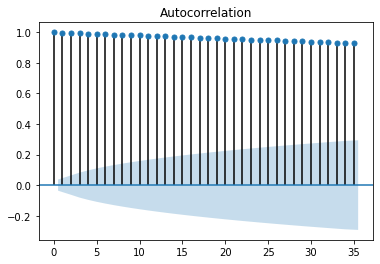

In [90]:
from statsmodels.graphics.tsaplots import plot_acf

#plot_acf helps finding q
plot_acf(amzn_train)
plt.show()

We can set q value as 0/1 or 2

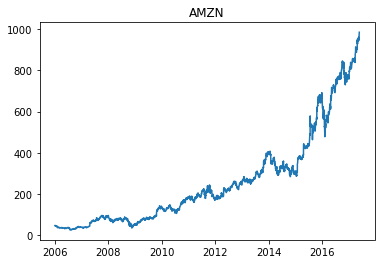

In [91]:
plt.plot(amzn_train)
plt.title("AMZN")
plt.show()


* We plot the graph in order to find out the trend.
* d value of amazon stock is 1, done by Dickey Fuller test

In [92]:
#amazon Arima p =1 q=0/1/2 d=1
from statsmodels.tsa.arima_model import ARIMA

# Hyperparameter Tuning

We choose the right hyperparameter for p,d,q based on performance against a validation dataset.

In [93]:
#forecasting amzn stock
history=[x for x in amzn_train]
y_pred=[]
y_test=amzn_test.values
hyperparameters=(1,1,0)
for t in range(len(amzn_test)):
    model=ARIMA(history,order=hyperparameters)
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    y_pred.append(yhat)
    obs=y_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))



predicted=984.574169, expected=995.000000
predicted=994.643908, expected=996.510000
predicted=996.758558, expected=1000.000000
predicted=1000.111762, expected=998.590000
predicted=999.042746, expected=998.990000
predicted=999.316526, expected=1007.230000
predicted=1007.012678, expected=1012.000000
predicted=1012.027943, expected=1005.950000
predicted=1006.727865, expected=1012.060000
predicted=1011.991516, expected=1012.500000
predicted=1012.828126, expected=967.000000
predicted=970.524953, expected=977.990000
predicted=977.534197, expected=988.590000
predicted=988.177388, expected=958.700000
predicted=961.272397, expected=996.000000
predicted=993.222735, expected=1017.000000


/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1015.759759, expected=998.000000
predicted=999.866473, expected=998.700000
predicted=999.000356, expected=1002.230000
predicted=1002.307134, expected=1002.540000
predicted=1002.872477, expected=1008.500000
predicted=1008.386557, expected=990.690000
predicted=992.470408, expected=978.550000
predicted=979.843837, expected=979.000000
predicted=979.312273, expected=980.120000
predicted=980.380395, expected=972.790000
predicted=973.705999, expected=961.530000
predicted=962.738580, expected=964.660000
predicted=964.759332, expected=969.550000
predicted=969.515499, expected=985.000000
predicted=984.165222, expected=993.000000
predicted=992.747486, expected=1000.650000
predicted=1000.430442, expected=1004.620000
predicted=1004.678393, expected=1002.400000
predicted=1002.919623, expected=1004.690000
predicted=1004.873343, expected=1006.000000
predicted=1006.256976, expected=1025.000000
predicted=1023.944931, expected=1031.590000
predicted=1031.470322, expected=1021.280000
predicted=10

In [94]:
error=np.sum(np.abs(y_pred-y_test))
print("L1 error is ",error)

L1 error is  1880743.7418177095


In [95]:
#forecasting amzn stock
history=[x for x in amzn_train]
y_pred=[]
y_test=amzn_test.values
hyperparameters=(1,1,1)
for t in range(len(amzn_test)):
    model=ARIMA(history,order=hyperparameters)
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    y_pred.append(yhat)
    obs=y_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=984.185024, expected=995.000000
predicted=995.511231, expected=996.510000
predicted=996.646165, expected=1000.000000
predicted=1000.300007, expected=998.590000
predicted=999.038931, expected=998.990000
predicted=999.233327, expected=1007.230000
predicted=1007.205035, expected=1012.000000
predicted=1012.358648, expected=1005.950000
predicted=1006.607073, expected=1012.060000
predicted=1011.851596, expected=1012.500000
predicted=1013.218818, expected=967.000000
predicted=969.431339, expected=977.990000
predicted=976.137682, expected=988.590000
predicted=989.850269, expected=958.700000
predicted=960.957065, expected=996.000000
predicted=992.641360, expected=1017.000000
predicted=1016.471401, expected=998.000000
predicted=999.968243, expected=998.700000
predicted=998.870293, expected=1002.230000
predicted=1002.318712, expected=1002.540000
predicted=1002.889488, expected=1008.500000
predicted=1008.387967, expected=990.690000
predicted=992.493512, expected=978.550000
predicted=979.

In [96]:
error=np.sum(np.abs(y_pred-y_test))
print("L1 error is ",error)

L1 error is  1881713.430377761


* So the best model we have for forecasting AMZN prices is the AR model with one lag parameter. 
* This could have informally been seen by noticing the high degree of correlation b/w X_t and X_t-1 in the PACF plot. 

# Conclusion
* In this kernel, by means of visualization we realised how the growth of AMZN stock evolved over time compared to WMT stock
* We performed statistical tests like the ADF test and Granger causality test to check the presence of a unit root/ to check correlation b/w the different time series
* We forecasted prices of the stock prices using a VAR model and ARIMA model
* Hyperparameters for ARIMA model was chosen based on performance against validation set
* We concluded that for this dataset the AR model with 1 lag value did best when compared to the other models

# References used
* https://machinelearningmastery.com/ The section on time series on this website